In [1]:
import pyper
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = pd.read_csv('~/tmp/testdata1.csv')
data.head()

,徳川,豊臣,織田,武田,上杉
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,1,1,0


In [3]:
r = pyper.R(use_pandas='True')
r.assign('data', data)
r("require(ltm)")
r("model2 <- ltm(data~z1, IRT.param=TRUE)")
val = r.get('summary(model2)')

v = val['coefficients']
print(v)

[[ -1.17618278e+00   7.69705911e-01  -1.52809374e+00]
 [ -3.91601341e-01   4.44943986e-01  -8.80113797e-01]
 [ -5.29048667e-02   8.23437268e-01  -6.42488126e-02]
 [  2.01318185e-01   5.04390174e-01   3.99131854e-01]
 [  1.15882655e+00   8.25754815e-01   1.40335428e+00]
 [  1.21581377e+00   9.13599813e-01   1.33079468e+00]
 [  1.57426875e+00   1.04562219e+00   1.50558086e+00]
 [  1.68993942e+01   2.60584950e+02   6.48517661e-02]
 [  1.16967184e+00   8.44594208e-01   1.38489209e+00]
 [  1.18116242e+00   9.75250803e-01   1.21113709e+00]]


In [4]:
column = data.columns
l = []
for i in range(len(column)):
    l.append(column[i])

n = len(v) // 2
a = []
b = []
for i in range(n):
    a.append(v[i+n][0])
    b.append(v[i][0])

print(l)
print(a)
print(b)

['徳川', ' 豊臣', ' 織田', ' 武田', ' 上杉']
[1.2158137738704999, 1.5742687503641899, 16.899394224450202, 1.16967183728793, 1.1811624201719699]
[-1.1761827818975401, -0.39160134082849202, -0.052904866739016697, 0.20131818492536299, 1.1588265500100701]


In [5]:
%matplotlib inline

In [6]:
def model2pl(a, b, xarray):
    ans = []
    for x in xarray:
        exppart = math.exp( -1.701 * a * (x - b))
        ans.append( 1.0 / (1.0 + exppart))
    return np.array(ans)

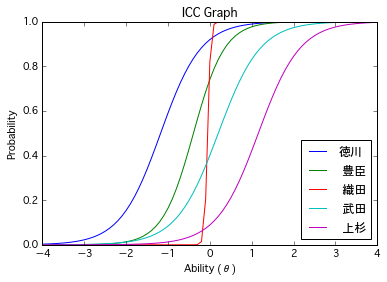

In [7]:
x = np.arange(-4.0, 4.0+0.01, 0.1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(len(l)):
    val_a = a[i]
    val_b = b[i]
    ax.plot(x, model2pl(val_a, val_b, x), label = l[i])
ax.set_xlim(-4, 4)
ax.set_ylim(0, 1)
ax.set_title('ICC Graph')
ax.set_xlabel('Ability (θ)')
ax.set_ylabel('Probability')
plt.legend(loc='lower right')

In [8]:
fig.savefig('graph.pdf')